In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
# from pandas_datareader import data as pdr
import yfinance as yf

In [7]:
# stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
# stocks = [stock + '.AX' for stock in stockList]
# stocks
stockList = ['AAPL', 'GOOG', 'AMZN', 'QCOM', 'MSFT', 'TSLA']

In [8]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
print(startDate,'\n',endDate)

2022-10-24 13:57:20.034880 
 2023-08-20 13:57:20.034880


In [33]:
def get_data(stocks, start, end):
    print(stocks)
    stockData = yf.download(stockList, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
#     print(returns)
    meanReturns = returns.mean()
#     print(meanReturns)
    covMatrix = returns.cov()
    print(covMatrix)
    return meanReturns, covMatrix

# get_data(stocks, startDate, endDate)

In [34]:
meanReturns, covMatrix = get_data(stockList, startDate, endDate)
# print(meanReturns)
# print(covMatrix)

['AAPL', 'GOOG', 'AMZN', 'QCOM', 'MSFT', 'TSLA']
[*********************100%***********************]  6 of 6 completed
          AAPL      AMZN      GOOG      MSFT      QCOM      TSLA
AAPL  0.000301  0.000209  0.000253  0.000224  0.000263  0.000322
AMZN  0.000209  0.000614  0.000362  0.000312  0.000281  0.000367
GOOG  0.000253  0.000362  0.000518  0.000312  0.000257  0.000296
MSFT  0.000224  0.000312  0.000312  0.000385  0.000243  0.000244
QCOM  0.000263  0.000281  0.000257  0.000243  0.000566  0.000354
TSLA  0.000322  0.000367  0.000296  0.000244  0.000354  0.001463


In [11]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
weights

array([0.06337575, 0.30915131, 0.08635893, 0.16911305, 0.10691107,
       0.26508988])

In [12]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days

In [13]:
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM

array([[9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 8.28843370e-04],
       [9.04156453e-04, 8.20219011e-04, 1.32366961e-03, 1.39514069e-03,
        1.00080456e-05, 

In [14]:
meanM = meanM.T
meanM

array([[9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.04156453e-04,
        9.04156453e-04, 9.04156453e-04, 9.04156453e-04, 9.041564

In [15]:
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
portfolio_sims

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    print(Z)
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    print(L)
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    print(dailyReturns)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio



[[-1.11900935e-01  1.22975628e-01  1.28635772e-01  3.28753949e-01
  -4.46784339e-01 -4.10823736e-01]
 [-8.70286529e-01  1.14285483e+00  1.20805220e+00 -8.69539382e-01
  -1.95424332e-01 -3.67849927e-01]
 [-5.34923446e-02  6.59398260e-02  4.84571717e-01 -5.57871119e-02
  -1.23165618e+00 -1.54458685e+00]
 [-1.50267428e-01  1.20070747e+00 -1.29203154e+00  1.12946074e+00
   7.05927573e-01  1.85088702e-01]
 [ 2.19170532e-01  8.41079660e-01 -4.08822065e-01  9.25086912e-01
  -1.66887221e-01 -1.24992763e+00]
 [ 1.10456853e+00  3.93247658e-01 -1.09888951e+00 -2.01797918e-01
  -9.39417207e-01  2.89394470e-02]
 [ 1.27644368e+00  2.30907076e-01  4.65727939e-01 -9.11370132e-01
  -8.47833383e-01  9.03087337e-01]
 [-6.81880644e-01  1.18240025e+00  7.53661083e-01 -1.69620072e+00
  -1.42336673e+00  9.52255752e-01]
 [ 5.43987689e-01  2.58578603e-01  4.14937047e-01  2.67316371e-01
   1.29850562e+00  1.72218903e-01]
 [-3.18909748e-01  1.85526337e+00  4.03739546e-01  4.19837907e-01
  -2.97771148e-01  9.5668

[[ 9.47059834e-01  1.23333082e+00  4.34726611e-01  7.27462210e-01
  -1.66600689e-01  2.07373228e-01]
 [ 3.97919089e-02  1.34874379e-01 -7.17481119e-01 -2.21492496e-01
  -8.50874952e-01  1.06499555e+00]
 [-9.77929951e-01  2.05664829e+00 -1.17210974e+00 -8.36995031e-01
   1.09635555e+00 -8.97340875e-01]
 [ 1.07616815e+00  2.95008317e-01  1.62594498e+00  7.37588694e-01
   6.08175083e-01 -6.65489845e-01]
 [ 6.30396725e-01 -9.39659597e-01  1.84926552e+00  2.08401806e+00
   1.64835678e-01 -6.22519859e-01]
 [-5.14705070e-01 -1.94887679e-01  4.96163732e-01 -2.93974366e-02
  -3.90072767e-01  3.55858579e-01]
 [-8.21614764e-01 -7.73489884e-01 -1.63080625e+00  1.47489207e+00
   1.10894832e-01 -6.73215271e-03]
 [ 6.46441572e-01  6.29215854e-01 -3.48357810e-01 -2.40636555e+00
   4.61814788e-01 -7.20031953e-01]
 [-5.38331983e-01  1.10866483e+00 -1.55442131e+00 -9.02067079e-02
  -1.07343014e+00 -1.62667516e+00]
 [ 2.18446909e-01  1.66245682e-02 -2.19551257e-01 -2.74113203e-03
  -1.20073493e+00  1.7077

[[ 1.15285937e-02 -1.44952379e-02  2.04632210e-02  8.38493102e-04
   3.95501319e-02  6.58968321e-04 -2.68046147e-02  7.61456684e-03
  -1.11507083e-02 -1.95508755e-02  2.24763824e-02 -2.98017768e-02
   2.26260377e-02  1.28750923e-03  1.79104357e-02  7.93619811e-03
  -4.09260951e-03 -1.53047605e-03 -5.57861491e-03  1.53862942e-03
   1.62093050e-02 -2.42986022e-02 -2.95338943e-03 -2.56729835e-02
  -4.67306302e-03  1.59982478e-02 -1.18241490e-02  2.32121682e-03
   4.91780916e-02  3.34002712e-02 -1.24339931e-02  5.20845398e-03
   1.94197122e-02 -1.07056793e-02  3.18394147e-02 -3.00972988e-02
  -1.18229581e-02  1.16907449e-02 -7.02358554e-03  2.48034490e-02
   9.89171487e-03  4.61879224e-03 -8.42864830e-03 -2.10270005e-02
   1.53420575e-02 -2.86725817e-03 -3.22350784e-03  8.01948842e-04
  -2.54070308e-02  1.87926562e-03 -4.24478517e-03 -2.35223170e-02
   5.79941263e-03 -2.96270671e-04 -1.49610978e-02  3.25452202e-03
  -2.74129566e-03 -9.51347243e-03  8.23620642e-04 -4.34624355e-02
  -1.66916

[[-5.09619046e-02  5.68516961e-01 -8.41414553e-01 -1.11209805e+00
  -5.43776004e-01  3.66126474e-01]
 [ 1.82401558e+00 -1.90498653e-01 -9.74225847e-01 -1.80154369e-01
  -1.36344976e+00  6.13268457e-02]
 [-2.93383571e+00  9.61242011e-01  1.64153602e+00  1.68061500e-01
  -1.62464969e+00 -2.02531069e-01]
 [-2.57914834e-01 -1.64602178e-01 -1.35684480e+00 -9.29336384e-01
   6.08953086e-01  1.41103388e+00]
 [ 5.35061365e-01  4.05060094e-01 -1.32698128e+00  5.40654920e-01
  -1.77845561e-01 -1.53935239e-01]
 [-5.69209110e-01  5.68787842e-01  1.48578987e+00 -7.60198430e-01
  -1.51134857e-01  6.62290543e-01]
 [-1.13140432e+00 -1.86876135e+00  1.71210771e+00  7.11926001e-01
   3.12323150e-02  1.34655355e+00]
 [-2.69526286e-01 -7.07406380e-01 -1.09028342e+00  1.38654214e-01
  -4.76150808e-01  6.62474762e-01]
 [ 3.94815483e-01 -1.09933006e+00  8.65295414e-01  1.47697532e+00
   1.02628982e+00  4.28802645e-01]
 [-5.09168096e-01 -3.02184158e-01  1.75167027e+00 -1.46966791e-02
  -2.67899975e-01  2.7267

[[ 1.90142882e-02 -9.73634354e-03  2.63577401e-02  1.38663111e-03
   2.77861299e-04  4.45121599e-03 -2.01201357e-02 -3.72821983e-03
  -1.81478729e-02  2.13263054e-02 -1.62002476e-03  2.00009821e-02
  -2.69618048e-03  7.76698192e-03 -1.12384580e-02  3.48702710e-02
   4.48962857e-03  2.72554428e-02  2.07910777e-02 -2.08242587e-03
   1.21180036e-02  1.10274843e-02  3.31305569e-02 -5.08506626e-03
  -9.33115274e-03 -1.08588587e-02  3.54497914e-02  2.36576327e-02
  -6.86743286e-03 -7.50035410e-03  2.77651511e-03 -4.61186123e-02
  -1.21742716e-02  1.70257356e-03  3.84942706e-02 -4.01937351e-03
   2.46229027e-03  1.13725985e-02  1.92913428e-02  4.21161936e-02
  -3.08610354e-02 -2.38763550e-02 -1.80874259e-02  7.36087415e-03
  -1.84799536e-02  1.99696529e-02 -2.07917970e-02  1.22581449e-02
   1.49125148e-02  6.02873365e-03  5.92087307e-02  5.87182887e-03
  -1.08679874e-02  2.11242417e-02  2.98521965e-03 -2.57772780e-02
  -1.31602475e-02 -8.90660632e-04  2.95928389e-02 -1.66336131e-03
  -5.29341

[[-8.33227276e-01 -4.82209161e-01  7.82518057e-02 -1.09263816e+00
  -2.98204590e+00 -1.13776563e+00]
 [ 2.60179029e-01 -8.21653871e-01 -3.38461962e-01  3.14878104e-01
  -1.50683664e-01 -1.78820404e-01]
 [ 5.15981725e-02 -2.48844491e+00 -4.21346965e-01 -3.67980869e-01
  -1.60348282e+00 -1.86739763e-01]
 [ 5.98163431e-01 -2.76807794e+00 -1.91349123e+00  1.27749554e+00
   8.88668155e-01 -7.96046537e-01]
 [-1.09986560e+00  1.59835170e+00  1.26385065e+00 -1.31629940e+00
  -6.16328873e-03  1.38480079e+00]
 [-2.50669032e+00  5.38933248e-01 -1.14382448e+00  6.37556235e-02
  -2.15326051e-01 -2.27701141e-01]
 [-1.98235394e-01 -4.18632473e-01  8.24873854e-01  1.58118296e-01
  -4.67702854e-01  5.01628977e-01]
 [ 6.97064720e-01 -6.49062934e-01 -1.01552928e+00 -1.44453777e+00
   5.88080785e-01 -1.71058927e+00]
 [-1.49668916e+00  1.43194820e+00 -9.38310228e-01  1.18815118e+00
   1.64491538e+00  1.77871674e+00]
 [ 1.70426110e+00 -2.47881398e+00 -5.06673003e-01  1.36719609e-01
   1.23666789e+00 -3.9902

[[ 1.38182217e-02  2.84238583e-02 -3.79242041e-02 -5.10944530e-04
   3.41499325e-02 -9.75279914e-03  1.49593486e-02  1.82298057e-02
   1.06327212e-03 -1.75147811e-04  2.20209911e-02  2.85993687e-02
   1.81377626e-02 -1.50838202e-02  1.09616242e-02 -5.52598752e-03
   2.18345005e-02 -2.93014037e-02 -1.89854998e-02 -5.54586773e-03
   1.39978576e-02  3.05686268e-03  3.98664807e-03 -1.68696861e-02
   7.31477080e-03  8.29041671e-03 -1.77426205e-02 -3.47339783e-02
  -2.10561357e-02  2.29844118e-03  3.71016961e-03 -5.12036669e-03
  -1.04056508e-02  8.22130827e-03 -5.36625211e-03 -7.82207213e-03
  -2.54252736e-03  1.39135273e-02 -1.01443123e-03  1.39288972e-02
   2.84495563e-02  4.02085708e-03  2.14872419e-02  2.62457874e-02
   1.96557430e-03 -1.35175717e-03 -1.45065868e-02  2.29537697e-03
   1.84619818e-02 -8.22718555e-04  7.66042713e-03 -3.14473520e-03
  -3.04896574e-02 -1.07192068e-02 -2.62659467e-02  1.04340752e-02
   1.08759057e-02  7.88199787e-03 -3.42651955e-02  1.61373183e-02
  -1.94043

[[ 2.85982977e-02 -1.16918104e+00 -4.28808421e-01  1.18935497e-01
   1.12288874e+00  5.77275190e-01]
 [-1.05333591e-01 -1.44767468e-01 -7.80719553e-01 -6.79307069e-01
  -9.04787213e-01  1.41543614e+00]
 [-1.73925354e+00  7.28729272e-02 -6.58307512e-01  6.55305435e-01
  -1.56327133e+00 -3.85557789e-01]
 [ 7.38774048e-01 -2.87320001e-01 -2.58006173e+00 -5.47279871e-01
  -1.03726531e+00 -6.23731183e-01]
 [ 1.08838378e+00 -4.47449036e-01 -8.79179075e-01 -1.20693946e+00
  -7.88692924e-01  1.28315421e+00]
 [ 1.09816946e+00 -1.20896474e-01  1.46864203e-01 -2.69185233e-01
   1.46637035e+00  3.03508644e-02]
 [-1.37694247e+00  4.24828692e-01  2.82886747e+00 -5.29575893e-01
   8.17748355e-01 -7.65076744e-01]
 [-1.51631736e+00 -4.81342606e-02 -6.41106394e-01  1.41419720e+00
  -5.55445880e-01 -6.67134467e-01]
 [ 1.53947591e+00  5.03830391e-01 -3.23751375e-02  2.80460507e-01
   7.06504639e-01 -3.99875159e-01]
 [-1.08663142e+00 -9.24247058e-01 -1.58572636e+00  2.17982717e+00
  -2.26955219e-01  8.2735

[[-3.87905627e-01  3.60757749e-04 -1.92918065e+00  9.44945396e-01
   1.12296250e+00  1.35446474e+00]
 [ 9.35026325e-01 -7.16060523e-01 -8.49829584e-01 -1.98345291e+00
  -1.55195407e-01  5.96429439e-01]
 [ 6.30178649e-01 -6.10755805e-01 -6.60678432e-01 -1.03627674e-01
   5.59599773e-01 -5.49471977e-01]
 [-1.18350131e+00  8.99521348e-01  7.48048444e-01  1.88413163e+00
   8.78520938e-01 -9.72069595e-01]
 [ 9.52095433e-01 -2.65275016e-02  2.24163493e-01  5.46609188e-01
  -1.13610121e+00 -3.06936882e-02]
 [-5.41006176e-01  2.11650177e-01 -6.48477870e-01 -7.95782198e-02
   9.48859397e-01 -1.13079260e+00]
 [-2.42619701e-01  2.80578644e-01  5.82751167e-01 -5.40906242e-01
   7.35832041e-01 -1.14064461e+00]
 [ 8.04036296e-01  8.78588294e-01  1.34773835e+00  1.65397830e+00
   1.49716567e+00 -8.42937832e-02]
 [ 7.35154478e-01  6.25674007e-01  4.57244420e-01 -4.03568212e-01
  -1.20195120e+00 -1.52987693e+00]
 [ 9.13657671e-01 -1.10239081e+00 -1.09845604e+00 -6.31792648e-01
   2.50353869e-02  1.6379

[[ 2.87095065 -1.48613948  1.00896836  1.94770469 -0.89655121 -0.44297225]
 [-0.3129001  -0.17769808 -1.34023836 -0.12838955  1.82712267  0.15103798]
 [-1.19073822 -0.58352832  0.01454236  0.8592646  -0.15615837  0.40902232]
 [ 1.21746539 -0.52479326  0.71076984 -0.16612982  0.79527827  1.06958055]
 [ 0.95259342 -0.40193376  0.01046927  0.91833346  0.82775583 -0.25345883]
 [-1.41070456  0.45405431  0.37165924 -0.0166549  -1.11603575  0.06350562]
 [ 0.26393251  0.46358508 -1.26439962 -0.78635012 -0.86370441  0.74277712]
 [-0.71586154 -0.81516909 -0.36962065  1.50321916  0.07154694  0.56652018]
 [-0.56698382 -0.01978673 -0.13477849 -0.9937682  -0.36235877  1.04543581]
 [ 0.78095918  0.12037035 -1.70414048  1.07926738 -0.70435325 -0.63192486]
 [-0.61421815 -0.73929062 -1.01174578  0.87733582  0.95631118 -0.3333381 ]
 [ 0.96434445  1.20822581 -1.02015268  0.31592843  0.82550774  0.44271594]
 [-0.96272672  0.76567334  0.7730379  -0.3435243   0.30755726  3.07321881]
 [-0.47185016  0.48735608

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 9.16638262e-01  7.40397185e-01 -1.10417073e+00 -4.60144121e-01
   1.70650450e-01  4.77181505e-01]
 [ 1.24755757e-01 -3.22810852e-01 -4.13874172e-01 -3.80853874e-01
   5.97203059e-01 -1.26634681e+00]
 [-7.35814845e-01  1.95849219e-01 -5.45292824e-01 -1.43865543e-01
   7.26932836e-01 -1.83576205e+00]
 [-1.00976990e+00  1.22122005e+00  1.64643257e+00  3.43743822e-01
   1.71324710e+00  1.52473580e+00]
 [ 1.22665492e-01 -1.16131707e+00 -1.45266042e+00  4.61179315e-01
   4.57383964e-01  2.26989540e+00]
 [-4.76579811e-02 -6.71315496e-02  5.26842946e-01  2.01798082e-01
   6.99179509e-02  4.85260082e-02]
 [ 3.45788716e-01  4.43731310e-01  4.81782998e-01  1.38108972e+00
  -2.00860167e+00  2.77240993e-01]
 [ 8.90871755e-01 -1.69459586e+00 -1.20270693e+00 -1.13580641e+00
   1.75008170e-01 -1.90203629e+00]
 [ 1.54866848e+00  2.16358494e+00 -1.53078177e+00 -4.74970303e-01
   8.76437029e-02 -1.90373588e+00]
 [ 1.76428927e+00  1.17889497e+00 -1.65981856e-01  8.37188477e-01
  -1.00732372e+00 -7.2734

[[-7.54841138e-01  1.34056478e+00 -1.66803933e+00 -4.91331242e-01
   1.51631699e+00  8.10244759e-01]
 [ 1.17635336e+00 -2.26581927e+00  8.50508757e-01  2.58849193e+00
   1.22845861e+00  1.50356575e-01]
 [-7.01394730e-02 -2.87746174e+00 -1.55156733e-01  1.49679616e+00
   9.30640373e-01  1.19907520e+00]
 [-6.16118032e-01 -1.78079434e-01 -2.44375365e+00 -1.08230691e+00
  -5.41078936e-01 -4.37513534e-01]
 [ 1.05714537e+00 -1.05089219e+00  5.92678657e-01  6.25107025e-01
   1.89928816e-01  6.04837177e-01]
 [-4.45680802e-01  8.58358048e-01 -8.39476632e-02  6.31674498e-01
  -1.75744085e+00  2.33813489e+00]
 [ 1.22999444e+00 -7.96268857e-01  2.65022870e-01  1.07939650e+00
  -6.01321571e-01  4.47319819e-01]
 [-2.49364049e+00 -8.67271213e-01 -4.23727313e-01 -2.18495098e-01
   7.55849210e-01  7.87252117e-01]
 [ 3.96677900e-01  9.70056813e-01  4.80247039e-01  2.29571709e-01
  -1.42438129e+00 -1.91096513e-01]
 [-1.42399481e+00 -5.57751577e-01 -3.85309779e-01  1.85893499e-01
  -4.27617689e-01  3.0853

[[ 0.35723002 -0.93312644 -2.25996969  0.09028552 -0.71884605 -0.54778379]
 [-2.05935517 -0.36616472 -0.24193268 -1.24497754 -0.32423645 -1.20922917]
 [ 0.64044597  0.7993173   0.17191438  0.32450711 -0.1360994  -1.03371751]
 [-0.55114634 -1.29165345 -2.0583167   1.24576021  0.09369892  1.06436425]
 [ 1.25868134 -0.75283007  2.33555318  1.30805997 -1.33258144  0.18598571]
 [ 0.23414184  1.79612826 -0.16935195 -0.54015508 -2.03854494  0.63943328]
 [-0.25791536  0.64398381  1.56475469 -1.8268627   0.1780734   0.10591882]
 [-0.11424319  0.85390134 -0.74022477 -0.20694126 -0.34694499  0.16998209]
 [-0.29307202 -0.21589553  0.39688527  0.54345929 -1.00414504 -1.05419539]
 [-0.00587921 -0.17973201 -0.22185982  0.23047258 -2.18011836 -0.39421571]
 [-0.41306647  0.34443314 -0.55592623 -1.01330154  0.2673902  -1.35505335]
 [ 0.14215467 -0.8720793  -0.08541131 -1.21329631  1.7222735   0.05341821]
 [ 0.69110356 -0.70582101  0.33445315  0.25316412  1.18285428  1.86907457]
 [-1.27946563 -0.41832163

[[-0.09931549  1.65724133 -1.35468024 -2.19363689  0.63975668  0.48671387]
 [-0.02673364  0.67783591 -2.03788214 -0.44618551  0.15058295  1.57243515]
 [-0.48100188  0.04132471  0.29155927  0.34925618  1.32510582  0.32732482]
 [ 0.98112967 -0.7658513   1.21597049 -0.09769222 -0.4351593  -1.7806443 ]
 [ 0.60136793 -0.91107931  1.17970252  0.90719091 -0.35270873 -0.92483753]
 [ 0.01651739 -1.06288666  0.38383482 -0.53484275 -1.74855848  0.37643054]
 [-1.10533579  1.37992167 -1.37755756 -2.07322515  0.0323233  -1.47074081]
 [-0.51347795 -0.0285437  -1.13069833  0.32853413  0.36823728 -0.20103143]
 [ 0.44358875 -0.0209453  -0.73315087 -1.80299599 -1.1795271   0.40691152]
 [ 0.10099792  0.49822145 -0.09222093  1.20450615 -1.22905391  0.07050763]
 [-0.13725792 -0.86868252  1.70970746  1.60308992 -0.83260264 -0.60840965]
 [-0.30546205  0.2457865  -0.67393385 -1.43762327  0.15514866 -0.32322892]
 [-0.23566145 -2.1851498   0.50723556  1.0410732   0.72316734 -1.42295933]
 [ 0.98741817 -0.60055406

[[ 2.80922321e-01 -4.03004048e-02 -7.99399681e-01  3.75274633e-01
   1.36753802e+00  8.26055999e-01]
 [ 4.22428599e-01 -3.45926301e-02  8.64888140e-01 -1.39641791e+00
   2.66926068e-01  5.09679633e-01]
 [-4.99519169e-01  2.33803432e+00  2.17969268e-01  1.11452024e+00
   1.06937601e+00 -8.67530619e-01]
 [-9.06963562e-01 -5.92813348e-01 -4.63868530e-01  2.06565115e+00
  -4.81628498e-01  4.06199169e-01]
 [ 1.25417404e+00 -4.48403428e-01  8.75458372e-01  8.49419597e-02
   8.20156654e-01  3.87883175e-02]
 [-1.36880155e+00 -8.47536823e-01 -5.05224029e-01 -1.07769776e+00
  -1.73484003e+00  2.11911317e+00]
 [ 3.28124303e-01  2.63466714e-01  6.47550338e-01 -1.03073565e+00
   5.74313139e-01 -1.02908687e-01]
 [-6.16042395e-01  9.20947092e-01 -4.18443311e-01  1.40672487e+00
  -1.22981910e+00 -1.00109757e+00]
 [ 7.22008747e-01 -1.36261640e-01 -1.35944745e+00  4.14100717e-01
  -3.55361243e-01  1.08049414e-01]
 [-1.66625444e-01 -1.98759914e+00 -6.03268356e-01  1.33106068e-01
  -5.20927917e-01  2.2193

[[ 0.81009704  0.06781538 -0.40516456  0.55642907  0.78889888 -0.1935871 ]
 [ 0.83027355  0.19361555 -1.92938695  0.4020054  -0.53197638 -0.79492818]
 [ 0.74147532  0.2707586  -1.71792512 -0.30856933  0.69010089 -1.94007634]
 [-1.34063894  0.40481816  0.42808411 -1.59615232  1.15307842  0.01945867]
 [ 1.15154897 -0.44617221 -1.00828204 -1.54843765  0.85631784 -0.02243175]
 [-0.87914357  1.72532855 -0.72064532 -0.35175842 -0.90566797 -0.61837456]
 [-1.34131103 -0.09997855 -0.15047011 -0.30332142  1.11596495  0.16928539]
 [-0.87003916  0.95095222  1.23534704  0.97862417 -2.3168428  -0.92963729]
 [ 1.13545747 -0.18468664  0.28705256  0.7325517   0.27256481  0.55583847]
 [-0.38668282 -0.79233857  0.09775986  1.7342365  -0.54957471 -0.81370815]
 [ 0.02595117 -2.18856446 -0.12794833  0.14248314  0.78823222 -0.38679299]
 [ 0.53432147 -0.56595598  2.19399005  2.29304658 -0.66302078  0.59591241]
 [-1.13526027 -0.08856412 -0.33524667  1.55712827 -0.04674305 -1.60743884]
 [ 0.23847782 -0.21635208

[[ 6.57719502e-01  3.62460366e-01  4.69898638e-01 -2.20546489e+00
   5.18278552e-01 -4.40397980e-01]
 [ 1.25070399e+00 -6.27402744e-01 -2.03266331e-01 -4.92929502e-01
   8.66049198e-02  5.52110581e-01]
 [-2.88824036e-01  6.56602314e-01  9.79108527e-01 -1.14111236e-01
  -1.46598619e-01  1.56267256e-01]
 [ 6.12336585e-01  4.47101865e-01  7.87973572e-02  8.22683468e-01
   1.67693230e+00  1.63731344e-02]
 [ 1.02350325e+00  1.09208114e+00 -2.85735104e+00 -1.98639123e+00
   7.00966206e-01 -3.43655243e-01]
 [ 9.65373214e-01 -5.96901718e-01  2.61630857e+00  7.16210725e-01
  -6.81596271e-01 -9.31387764e-01]
 [-8.00989483e-01  1.81082544e+00 -3.30240859e-01  9.45720619e-02
   3.77217373e-01 -4.35089353e-01]
 [-1.05075543e+00  1.05281099e+00  3.70860608e-01 -1.60581209e+00
   1.13958390e+00 -1.88541854e-01]
 [ 5.71848624e-01 -1.77851382e-01 -7.57870446e-02  9.60514844e-01
  -1.25738849e+00  6.90703958e-01]
 [ 7.46018566e-01  1.92813016e+00  2.49004544e-01 -3.63122140e-01
   6.66833066e-01 -2.2105

[[-2.42458529e-02 -2.61909666e-02 -9.94730446e-03  4.86889139e-03
  -1.84943036e-02  1.39164603e-03 -2.07514667e-02  2.32856643e-02
   2.97878033e-02 -1.94855307e-03  1.71037103e-02 -4.48647696e-03
   2.40490326e-02 -2.70667609e-02 -1.87739036e-02 -5.64275033e-03
  -9.51544441e-03 -3.46954192e-02 -5.09629514e-03 -1.31155469e-02
   8.75261158e-03  2.75427273e-02  2.29510862e-02  9.31045729e-03
   7.15532444e-03  7.47608500e-03 -1.18226786e-02 -2.20800473e-02
   2.48177918e-02  1.72162640e-02 -2.72759411e-04  2.63785136e-02
   2.05284893e-02  7.34580021e-03  2.09486975e-02 -4.13012451e-02
   3.17386214e-02  2.02893510e-03 -1.68199393e-02 -7.35343133e-03
   3.53651137e-02 -9.60842417e-03 -9.17379899e-03 -7.61931970e-03
   4.69582046e-03 -7.90778084e-03 -4.21252475e-03  1.02196835e-02
   1.43558585e-02  6.40512546e-03  2.60589508e-02 -2.45082785e-02
  -1.90638575e-03 -4.81419319e-03 -1.27959235e-02  3.81435887e-02
   9.50519206e-03 -3.78880097e-02  1.60281573e-02  4.25971349e-03
   2.16566

[[-4.60847711e-01 -3.27042157e-01 -4.79583735e-01  8.42404070e-01
   5.03446740e-01 -5.07280836e-01]
 [-9.32267226e-01  4.83331874e-01 -2.42915144e+00  5.62769742e-01
  -4.86370045e-01 -1.82346558e+00]
 [-8.76857453e-01  5.11908480e-01 -7.41053657e-01 -5.40277645e-01
   1.30594398e+00  1.06823745e+00]
 [-3.72887833e-01  1.71599268e+00  2.91559779e-02  1.72930183e+00
   4.04229125e-01  5.65319727e-01]
 [-2.29217909e-01  6.10381065e-01 -1.60592291e+00 -9.92917011e-01
   9.39426396e-01 -6.84487222e-01]
 [ 5.00765339e-01  2.05774076e+00 -4.11076582e-01 -7.62885324e-01
  -2.33456858e+00 -2.35062108e+00]
 [-3.27256880e-01  2.17293211e+00  1.16806131e+00  7.98255140e-01
  -5.76343628e-01  5.83502197e-01]
 [ 8.02193429e-01 -1.18750736e+00  8.84499771e-01  8.54998913e-01
   5.51453210e-01  6.09163933e-01]
 [ 4.79542844e-01  1.11742421e+00  7.66550473e-01 -3.98357399e-01
   5.99323045e-01 -1.16813257e+00]
 [-3.05779826e-01  1.00536951e+00  5.71547440e-01 -5.45755865e-01
  -1.87731587e-03  1.3024

[[-1.33060657e-02  1.28077542e-03 -1.94219003e-02 -1.31978617e-02
   5.90715562e-03 -8.64684100e-03 -3.02971785e-02 -1.34512383e-02
  -5.55581870e-04 -3.26317703e-03  3.96748541e-03  9.92474386e-03
   8.10855484e-03  2.14048818e-02  2.22633045e-02 -3.03454614e-03
  -2.18431824e-04 -3.76353266e-02 -9.85144775e-03  1.27886578e-03
  -1.97370972e-03  1.64242605e-02 -7.27627362e-03  1.71307725e-02
  -2.30574631e-02 -2.76335376e-02  8.75652772e-03  1.96317021e-02
   2.02862105e-02  1.49593430e-02  2.75102429e-02 -2.20744512e-02
   2.05276350e-02  7.41208604e-03 -2.88771789e-02  1.01284186e-02
  -8.45210108e-03  1.31836802e-02 -1.32898323e-02 -3.22598024e-02
   4.96450499e-03  4.22863822e-03  3.95395483e-03  1.72092844e-02
  -2.81146381e-02 -7.79435269e-03  3.98536325e-03  3.96245180e-03
  -3.29673696e-03  2.05912548e-02  9.15626450e-03  8.73104554e-03
   2.60148006e-02  3.63920768e-03 -1.34416464e-02 -3.46213964e-03
  -6.33918197e-03  9.76356622e-03  3.03697089e-02 -1.58306840e-02
   1.87471

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



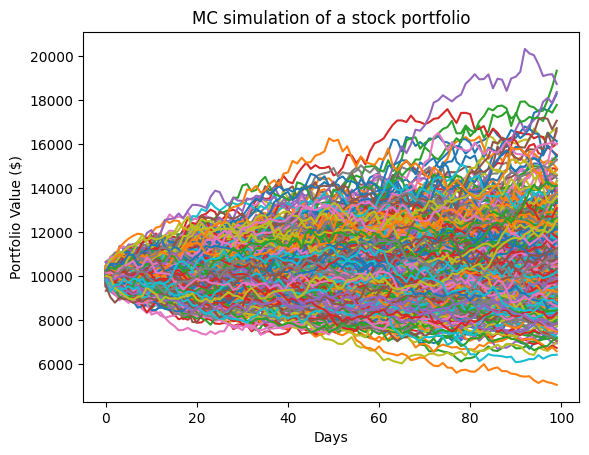

In [17]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [25]:
# import yfinance as yf
# import pandas as pd
# import datetime as dt

# stockList = ['AAPL', 'GOOG', 'AMZN', 'QCOM', 'MSFT', 'TSLA']
# endDate = dt.datetime.now()
# startDate = endDate - dt.timedelta(days=300)

# # Initialize an empty DataFrame to store the combined data
# combined_data = pd.DataFrame()

# # Download data for each stock symbol and concatenate it to the combined_data DataFrame
# for symbol in stockList:
#     data = yf.download(symbol, start=startDate, end=endDate)
#     data['Symbol'] = symbol  # Add a column to indicate the company
#     combined_data = pd.concat([combined_data, data])

# # Reset the index of the combined DataFrame
# combined_data.reset_index(inplace=True)

# # Print the combined data
# print(combined_data)
